<a href="https://colab.research.google.com/github/soukhind2/PRNI_summer_school/blob/master/PRNI_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRNI Tutorial - Deep Learning
In this tutorial you will learn to build neural network architectures with Keras.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

## The dataset
We load the dataset and inspect it.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We have 50,000 training samples and 10,000 test samples. Inputs are color images (3 colors) of size 32 x 32, and the output is a digit between 0 and 9. These correspond to the following categories:

In [ ]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'
          }

Let's plot some of the input images and their labels.

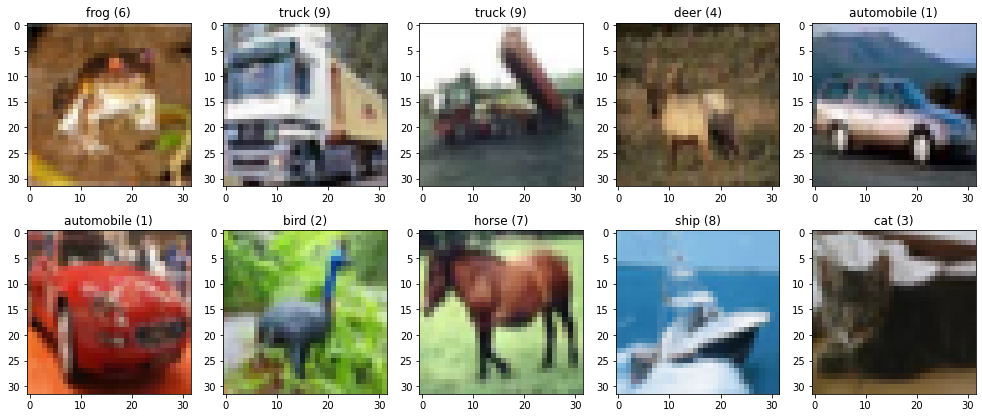

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(17,7))

for row in range(2):
    for col in range(5):
        axes[row,col].imshow(x_train[col+row*5])
        axes[row,col].set_title(labels[y_train[col+row*5][0]] + ' ({})'.format(y_train[col+row*5][0]))

## Preprocessing
Luckily we don't have to do much preprocessing on this dataset, but one thing we have to do is flatten the 3-dimensional input datasets, change the scale of the input from RGB values (0 to 255) to values between 0 and 1, and make the output a categorical variable.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# dimension of the input to the model
input_dim = x_train.shape[1]

## A very simple neural nework
We start out with a network with one fully connected hidden layer with 50 neurons and a relu (rectified linear unit) activation function. The output layer should have the same number of neurons as we have output classes, and the softmax activation function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=input_dim, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

Before we can use the model, we have to compile it. We also define a loss function, optimizer, and a list of metrics that we want to examine. (We can only define one loss function, but monitor several metrics.)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from numpy.random import seed
seed(1)

Now we can fit (train) the model with the training data. The number of times the model will go through the training data is called epochs. The validation set (in this case 10% of the trainig data) is used to evaluate each epoch.

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.9423 - accuracy: 0.2880 - val_loss: 1.8738 - val_accuracy: 0.3204
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8267 - accuracy: 0.3352 - val_loss: 1.8493 - val_accuracy: 0.3182
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8007 - accuracy: 0.3442 - val_loss: 1.8444 - val_accuracy: 0.3284
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7766 - accuracy: 0.3539 - val_loss: 1.7719 - val_accuracy: 0.3626
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7622 - accuracy: 0.3592 - val_loss: 1.7768 - val_accuracy: 0.3478
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7486 - accuracy: 0.3660 - val_loss: 1.7582 - val_accuracy: 0.3580
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7377 - accuracy: 0.3686 - val_loss: 1.7515 - val_accuracy:

The **training accuracy** is 0.258, which is not very good yet. (You might get a different value when running the notebook, since the inizialization of the network is random). Let's now look at the **test accuracy** by evaluating our model on the test set.

In [ ]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.9732 - accuracy: 0.2459
0.2459000051021576


This model correctly predicts the labels of 24.9% of the test set, which is more than chance (10%), but not yet very good.

## Exercise 1: Improving the network

Try to improve your network by adding more layers and neurons. 

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=input_dim, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
seed(1)

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8619 - accuracy: 0.3216 - val_loss: 1.8998 - val_accuracy: 0.3106
Epoch 2/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6906 - accuracy: 0.3922 - val_loss: 1.6371 - val_accuracy: 0.4190
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6073 - accuracy: 0.4223 - val_loss: 1.6010 - val_accuracy: 0.4290
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5604 - accuracy: 0.4402 - val_loss: 1.6009 - val_accuracy: 0.4178
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5222 - accuracy: 0.4518 - val_loss: 1.5660 - val_accuracy: 0.4376
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4894 - accuracy: 0.4662 - val_loss: 1.5501 - val_accuracy: 0.4436
Epoch 7/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4610 - accuracy: 0.4748 - val_loss: 1.5127 - val_ac

In [ ]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4909 - accuracy: 0.4688
0.46880000829696655


## Convolution layers
Instead of using fully connected layers, we will now build a network with one convolutional layer, which are very suitable for image classification tasks.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

Since convolutional neural networks (CNNs) read multi-dimensional data, we should not reshape the data like before. Let's load the data again.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Now we build a model, first with a convolutional layer, then a max-pool layer followed by flattening, and then a fully connected output layer.

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(MaxPooling2D(pool_size=3))
model2.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(MaxPooling2D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's check the summary description of our model.

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 64)          16448     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

Now we fit and evaluate the new model.

In [ ]:
model2.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.5540 - accuracy: 0.4308 - val_loss: 1.2435 - val_accuracy: 0.5610
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1718 - accuracy: 0.5805 - val_loss: 1.1232 - val_accuracy: 0.5962
Epoch 3/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0175 - accuracy: 0.6391 - val_loss: 0.9445 - val_accuracy: 0.6682
Epoch 4/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.9104 - accuracy: 0.6763 - val_loss: 0.8732 - val_accuracy: 0.6914
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8279 - accuracy: 0.7062 - val_loss: 0.8796 - val_accuracy: 0.6954
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7645 - accuracy: 0.7314 - val_loss: 0.8436 - val_accuracy: 0.7128
Epoch 7/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.7111 - accuracy: 0.7509 - val_loss: 0.8150 -

In [ ]:
_, test_acc = model2.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 1.0775 - accuracy: 0.7152
0.7152000069618225


In [ ]:
# predict category of each sample in the test set
y_pred = np.argmax(model2.predict(x_test), axis=1)

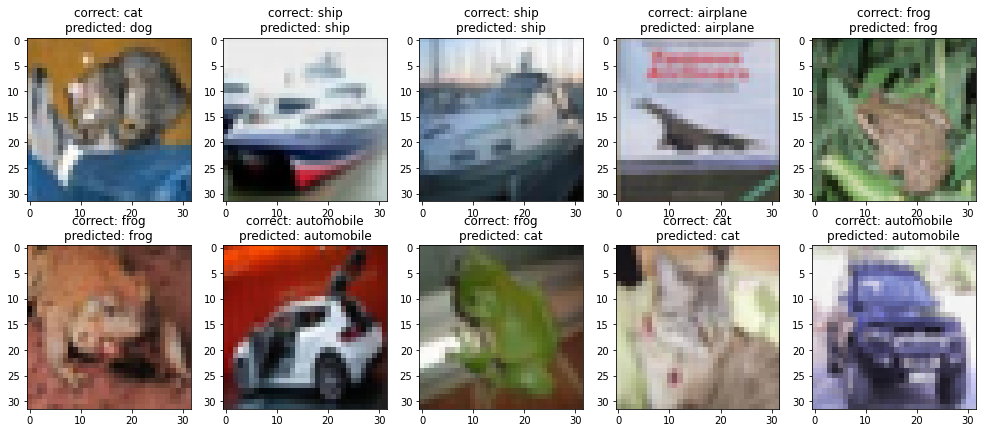

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(17,7))

for row in range(2):
    for col in range(5):
        axes[row,col].imshow(x_test[col+row*5])
        axes[row,col].set_title('correct: {}\npredicted: {}'.format(labels[np.argmax(y_test[col+row*5])], labels[y_pred[col+row*5]]))


Now the training accuracy is 0.73 and the test accuracy is 0.63, already much better than the simple fully connected model.

## Exercise 2: Improving the convolutional network

Try to improve the network by adding more convolutional layers and neurons. 

## Exercise 3: Full analysis

Load the MNIST handwritten digits dataset and perform all steps shown above. Try out different architectures to improve your model!

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

Hint: For the **CNN**, reshape your data using this code. (The data has only one color channel, so you need to add the channel axis).

In [ ]:
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)